<a href="https://colab.research.google.com/github/joseunghan/class2022spring/blob/main/20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

In [2]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')

### RMS(Root Mean Square) for intensity

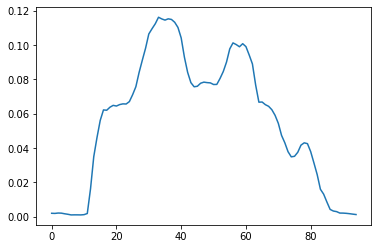

In [3]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

root mean square는 변화하는 값에 대한 통계 척도로 음과 양을 오가는 사인 함수에서 자주 쓰인다. 값들을 제곱한 뒤 값들의 갯수로 나눠주고 그것에 제곱근을 씌워서 값을 구한다. RMS는 평균 값과 매우 비슷한 성질을 가지는데 음과 양을 오가는 사인 함수의 경우 평균 값을 구하게 되면 0이 되는데 이는 올바른 평균 값을 나타낸다고 볼 수 없다. 그렇기 때문에 사인 함수의 경우 각각의 값에 제곱을 해준 뒤 제곱값의 평균을 구하고 거기에 제곱근을 씌워 원래의 값에 가깝게 해주는 방식으로 RMS를 이용해 올바른 평균 값을 구한다. audio에서 RMS는 시간에 따라서 amplitude가 얼마나 큰지 보여주며 amplitude가 클 경우 소리 크기가 커지기 때문에 RMS에서 높은 값이 나온 시간대는 소리가 크다는 것을 알 수 있다.

### Autocorrelation for pitch(F0) measurement

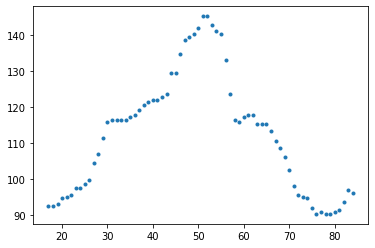

In [4]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')

autocorrelation은 어떤 신호와 그 신호에서 약간 시간을 지연시킨 신호 사이의 상관관계를 알 수 있게 해주는 지표이다. 시간이 지연된 뒤에도 처음의 신호와 비슷한 성분을 지니고 있다면 높은 값이 나오고 시간이 지연된 뒤 처음의 신호와 비슷한 성분을 지니고 있지 못하면 낮은 값이 나오게 된다. audio signal에서는 높은 autocoorelation을 나타낸다는 것은 지금의 신호가 이전의 신호와 비슷한 성분을 지니고 있다는 것을 의미하며 어떤 성분이 계속 유지되기 위해서는 pitch가 높아야 하기 때문에 높은 autocorrelation은 높은 pitch를 가지는 것을 의미한다. 실제로 위의 plotting도 높은 pitch를 나타내는 부분에서 높은 autocorrelation 값을 가지는 것을 볼 수 있다.